# Example data loading using repository module

This repository includes a python module to help load the data.
it relies on `pandas`

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
from pathlib import Path
from matplotlib import pyplot as plt

In [4]:
from model_analysis import * 

## Loading the list of model results

A complete list of model results is stored in the [`run-manifest.csv`](run-manifest.csv) file.
This file is automatically generated using git hooks, and maintains a list of properties about each run.


In [5]:
run_manifest = read_manifest('run-manifest.csv')
run_manifest.tail()

,folder,version,last available data,number of countries,number of zones,countries,modelling zones,
47,./runs/base-fullrun-20200511T100608-3761145,v3,2020-05-06,14,30,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",
48,./runs/base-fullrun-20200511T101124-3761147,v3,2020-05-08,1,17,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",
49,./runs/base-fullrun-20200511T100628-3761145,v3,2020-05-08,14,30,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",
50,./runs/base-fullrun-20200511T101145-3761147,v3,2020-05-10,1,17,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",
51,./runs/base-fullrun-20200511T100649-3761145,v3,2020-05-10,14,30,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",


## Reading model execution information

To parse the data of each run a small class `Model_Folder` is defined. It:

- Explores a folder looking for predefined csv files
- Loads them into `pandas.DataFrame` objects.

It provides a range of options for loading some or all the data through the
`load_data` method.

In [6]:
# Analyse a single folder
run_directory = "./runs/base-fullrun-20200428T002544-3665611"
single_run = Model_Folder(run_directory)

In [7]:
# Load all data
single_run.load_data()
print(f"Available types of data: {[key for key in single_run.data]}")

Available types of data: ['interventions', 'modelling', 'forecasting', 'ifr', 'reprodution', 'NPI impact']


In [8]:
# Load a single category of data from the csvs in that folder
single_run.load_data(data_category='interventions')
single_run.data['interventions'] .tail()

,Unnamed: 0,key,value,x,country,region
125,126,schools_universities,2020-03-14,4.3,Netherlands,Netherlands
126,127,self_isolating_if_ill,2020-03-12,4.3,Netherlands,Netherlands
127,128,public_events,2020-03-12,4.0,Netherlands,Netherlands
128,129,lockdown,2020-03-23,4.3,Netherlands,Netherlands
129,130,social_distancing_encouraged,2020-03-12,3.7,Netherlands,Netherlands


In [9]:
# Load two types of available data
single_run.load_data(data_category=['interventions', 'modelling'])
single_run.data['modelling'].tail()

,Unnamed: 0,time,country,region,reported_cases,reported_cases_c,predicted_cases_c,predicted_min_c,predicted_max_c,predicted_cases,...,estimated_deaths,death_min,death_max,death_min2,death_max2,rt,rt_min,rt_max,rt_min2,rt_max2
1820,1821,2020-04-22,Netherlands,Netherlands,729,34134,559692.051252,367143.634524,814120.800432,1600.766017,...,122.753181,99.020332,152.279956,113.075709,131.422140,0.504478,0.335103,0.680888,0.446892,0.561707
1821,1822,2020-04-23,Netherlands,Netherlands,708,34842,561173.767858,367442.320803,818055.269629,1481.716606,...,116.363721,92.569978,145.908987,106.610327,125.097792,0.504425,0.335095,0.680732,0.446867,0.561650
1822,1823,2020-04-24,Netherlands,Netherlands,887,35729,562545.724610,367706.147284,821786.130584,1371.956752,...,110.165900,86.163094,139.844690,100.306639,118.875632,0.504375,0.335089,0.680584,0.446845,0.561594
1823,1824,2020-04-25,Netherlands,Netherlands,806,36535,563816.454388,367938.943639,825333.627691,1270.729778,...,103.893499,80.216341,134.126621,93.883855,112.717012,0.504329,0.335083,0.680443,0.446824,0.561542
1824,1825,2020-04-26,Netherlands,Netherlands,655,37190,564993.797461,368143.141692,828691.371286,1177.343072,...,97.803703,74.187003,128.514881,87.743760,106.573795,0.504286,0.335078,0.680310,0.446806,0.561486


## Assembling a set of runs for analysis

The goal of these loading procedures is to then be assembled to facilitate analysis
and plotting

In [10]:
# By default all the data is loaded for all runs
analysis_set = get_analysis_set(run_manifest)

In [11]:
# But specific model runs and data can be loaded
select_single_country_run = lambda row: (
    row['number of countries']>1 
    and 'France' in row['countries']
)
analysis_set_france = get_analysis_set(
    run_manifest, selection_fun=select_single_country_run,
    data_to_load=['forecasting', 'modelling']
)

The data are available in the `'data'` field of the resulting dataframe

## Plotting

Some tools have been put in place so that you can start exploring the data.
These allow to plot for a single run forecast and modelled data.

First we access a single model execution:


In [12]:
model = analysis_set_france.iloc[-1,]["model"]

In this module the functionality allows to plot the following comparison in one line:

Plotting reports for France (Reported deaths to  2020-05-10)
Plotting reports for Spain (Reported deaths to  2020-05-10)
Plotting reports for Italy (Reported deaths to  2020-05-10)
Plotting reports for United_Kingdom
(Reported deaths to  2020-05-10)
Plotting model for France (model to  2020-05-10)
Plotting model for Spain (model to  2020-05-10)
Plotting model for Italy (model to  2020-05-10)
Plotting model for United_Kingdom (model to  2020-05-10)
Plotting forecast for France (forecast from  2020-05-09)
Plotting forecast for Spain (forecast from  2020-05-09)
Plotting forecast for Italy (forecast from  2020-05-09)
Plotting forecast for United_Kingdom
(forecast from  2020-05-09)


Text(0.5, 1.0, 'Reported, modelled and forecast daily deaths with 95% confidence intervals')

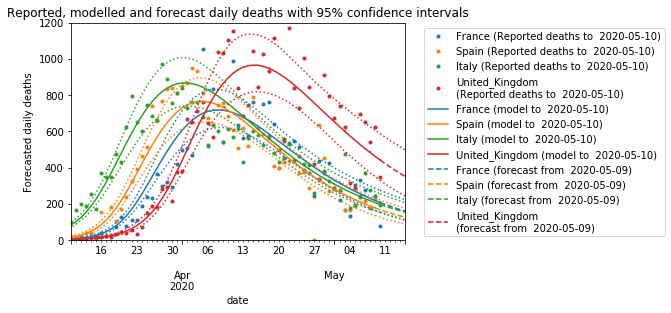

In [13]:
ax_out = compare_fatality_predictions(
    model.data,
    country_list=["France", "Spain", "Italy", "United_Kingdom"],
    # change this parameter to remove the confidence intervals (dashed lines)
    max_num_country_ci_display=4,  
)
# with some resizing of the plot to make it look better
axis_date_limits(ax_out, min_date='2020-03-10', max_date='2020-05-15')
ax_out.set_ylim(0,1200)
ax_out.set_title("Reported, modelled and forecast daily deaths with 95% confidence intervals")

While nice this plot may need to be modified. For this reason the plotting tools have
been built to be fairly easy to interact with and reconfigure at various levels of grouping.

At the lowest level there are `plot_timeseries_country` and `plot_timeseries_countries`.
You only need to use those to build your own low level plotting to access specific data.

The first functions you would use regularly are the following "single country" and "single quantity" function:

Using the function `plot_forecast_country`, `plot_model_country`, and `plot_measured_country`
we can rapidly visualise modelled, predicted and measured fatalities in a country.

Plotting reports for France (Reported deaths to  2020-05-10)
Plotting model for France (model to  2020-05-10)
Plotting forecast for France (forecast from  2020-05-09)


(<matplotlib.axes._subplots.AxesSubplot at 0x2021cf35148>,
 'France (forecast from  2020-05-09)')

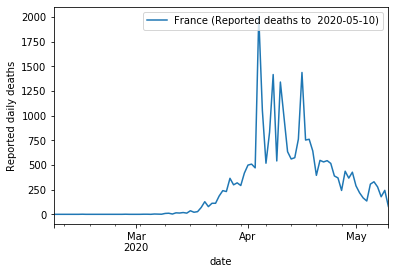

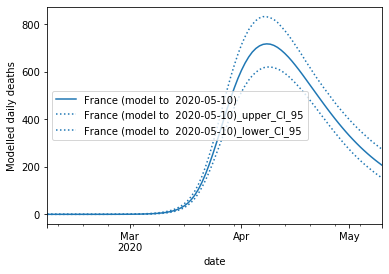

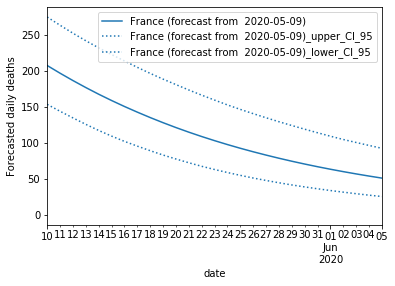

In [14]:
country = "France"
plot_report_country(model.data["modelling"], country)
plot_model_country(model.data["modelling"], country)
plot_forecast_country(model.data["forecasting"], country)

Most of the time we want multiple things on the same plot. Fear not! these functions
follow pandas and matplotlib format and accept a keyword argument `ax=<plt.Axes object>`:

Plotting reports for France (Reported deaths to  2020-05-10)
Plotting model for France (model to  2020-05-10)
Plotting forecast for France (forecast from  2020-05-09)


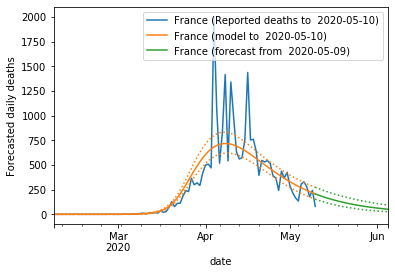

In [15]:
ax_france, _ = plot_report_country(model.data["modelling"], country)
plot_model_country(model.data["modelling"], country, ax=ax_france)
plot_forecast_country(model.data["forecasting"], country, ax=ax_france)

# Remove the labels by using this line:
remove_confidence_interval_legend_labels(ax_france)

This process is likely to be used often, so we have a function grouping all these functions

Plotting reports for France (Reported deaths to  2020-05-10)
Plotting model for France (model to  2020-05-10)
Plotting forecast for France (forecast from  2020-05-09)


(<matplotlib.axes._subplots.AxesSubplot at 0x2021d0c8e48>,
 ['France (Reported deaths to  2020-05-10)',
  'France (model to  2020-05-10)',
  'France (forecast from  2020-05-09)'])

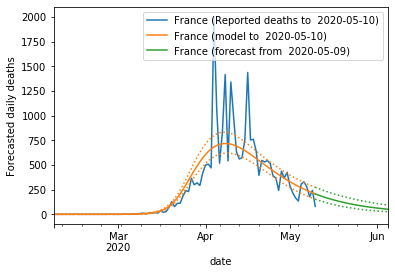

In [16]:
plot_daily_deaths_country(model.data, "France")

Now we want to understand what is going on with those huge spikes in the French data
this can be done by plotting multiple modelling zones using the  plural version of the above functions. In this case in the data set data for France is also modelled for its
hospitals (`France-hopitaux`) and its care homes (`France-EHPAD`).

Plotting reports for France (Reported deaths to  2020-05-10)
Plotting reports for France-EHPAD
(Reported deaths to  2020-05-10)
Plotting reports for France-hopitaux
(Reported deaths to  2020-05-10)
Plotting model for France (model to  2020-05-10)
Plotting model for France-EHPAD (model to  2020-05-10)
Plotting model for France-hopitaux (model to  2020-05-10)
Plotting forecast for France (forecast from  2020-05-09)
Plotting forecast for France-EHPAD (forecast from  2020-05-09)
Plotting forecast for France-hopitaux
(forecast from  2020-05-09)


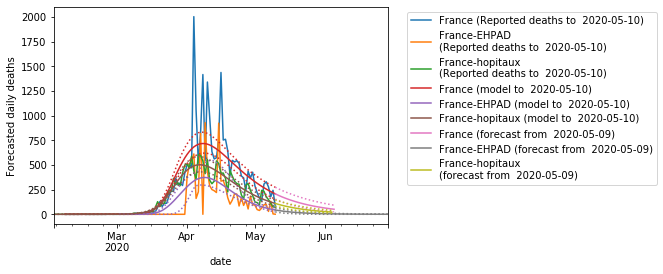

In [17]:
country_list = ["France", "France-EHPAD", "France-hopitaux"]
# Plot the data (the reported data without any line, and with a marker every time)
ax_compare = plot_report_countries(model.data["modelling"], country_list=country_list)
plot_model_countries(model.data["modelling"], country_list=country_list, ax=ax_compare)
plot_forecast_countries(model.data["forecasting"], country_list=country_list, ax=ax_compare)

# For clarity we remove the confidence intervals and the move the legend out
remove_confidence_interval_legend_labels(ax_compare)
modify_legend(ax_compare, bbox_to_anchor=(1.04, 1.0), loc='upper left')

At this stage the graphs are starting to look pretty good but the colours are not very instructive anymore.

In [18]:
prop_cycle = define_new_cycle(color_frequency=3, markevery=[5])
for c in prop_cycle:
    print(c)

{'marker': ',', 'markevery': 5, 'color': '#1f77b4'}
{'marker': ',', 'markevery': 5, 'color': '#ff7f0e'}
{'marker': ',', 'markevery': 5, 'color': '#2ca02c'}
{'marker': 'o', 'markevery': 5, 'color': '#1f77b4'}
{'marker': 'o', 'markevery': 5, 'color': '#ff7f0e'}
{'marker': 'o', 'markevery': 5, 'color': '#2ca02c'}
{'marker': 'v', 'markevery': 5, 'color': '#1f77b4'}
{'marker': 'v', 'markevery': 5, 'color': '#ff7f0e'}
{'marker': 'v', 'markevery': 5, 'color': '#2ca02c'}
{'marker': '+', 'markevery': 5, 'color': '#1f77b4'}
{'marker': '+', 'markevery': 5, 'color': '#ff7f0e'}
{'marker': '+', 'markevery': 5, 'color': '#2ca02c'}
{'marker': 'x', 'markevery': 5, 'color': '#1f77b4'}
{'marker': 'x', 'markevery': 5, 'color': '#ff7f0e'}
{'marker': 'x', 'markevery': 5, 'color': '#2ca02c'}


Plotting reports for France (Reported deaths to  2020-05-10)
Plotting reports for France-EHPAD
(Reported deaths to  2020-05-10)
Plotting reports for France-hopitaux
(Reported deaths to  2020-05-10)
Plotting model for France (model to  2020-05-10)
Plotting model for France-EHPAD (model to  2020-05-10)
Plotting model for France-hopitaux (model to  2020-05-10)
Plotting forecast for France (forecast from  2020-05-09)
Plotting forecast for France-EHPAD (forecast from  2020-05-09)
Plotting forecast for France-hopitaux
(forecast from  2020-05-09)


(0, 1200)

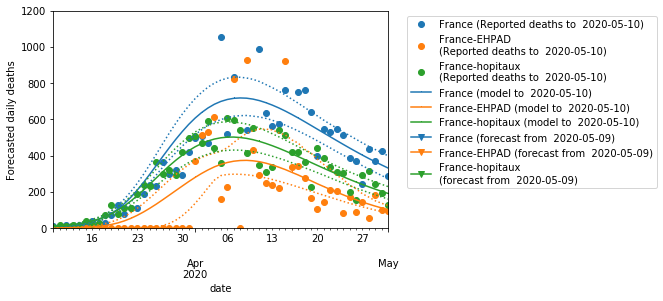

In [19]:
country_list = ["France", "France-EHPAD", "France-hopitaux"]

# define a new property cycle for the axes we are using
prop_cycle = define_new_cycle(
    marker=['o',',','v','+'], # which varies the marker
    color_frequency=len(country_list), # the same colour repats every 3 lines
    markevery=[5],  # Markers are plotted every 5 days
)
_, ax_compare = plt.subplots()
ax_compare.set_prop_cycle(prop_cycle)

# Plot the data (the reported data without any line, and with a marker every time)
plot_report_countries(model.data["modelling"], country_list=country_list, ax=ax_compare, linestyle='', markevery=1)
plot_model_countries(model.data["modelling"], country_list=country_list, ax=ax_compare)
plot_forecast_countries(model.data["forecasting"], country_list=country_list, ax=ax_compare)

# For clarity we remove the confidence intervals and the move the legend out
remove_confidence_interval_legend_labels(ax_compare)
modify_legend(ax_compare, bbox_to_anchor=(1.04, 1.0), loc='upper left')
# Adjust the zoom of the plot
axis_date_limits(ax_compare, min_date='2020-03-10', max_date='2020-06-01')
ax_compare.set_ylim(0,1200)

The same result can be achieved with some fine tuning using the grouped call which
plots model, forecast and reports in one line:

Plotting reports for France (Reported deaths to  2020-05-10)
Plotting model for France (model to  2020-05-10)
Plotting forecast for France (forecast from  2020-05-09)
Plotting reports for France-EHPAD
(Reported deaths to  2020-05-10)
Plotting model for France-EHPAD (model to  2020-05-10)
Plotting forecast for France-EHPAD (forecast from  2020-05-09)
Plotting reports for France-hopitaux
(Reported deaths to  2020-05-10)
Plotting model for France-hopitaux (model to  2020-05-10)
Plotting forecast for France-hopitaux
(forecast from  2020-05-09)


(0, 1200)

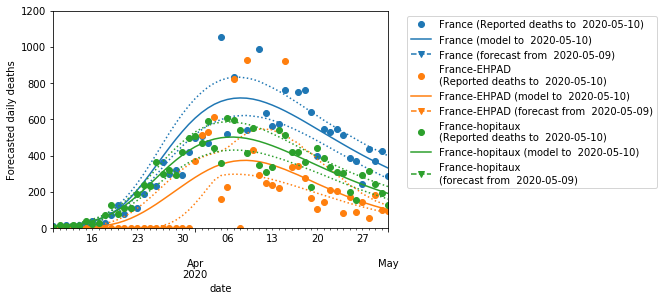

In [20]:
country_list = ["France", "France-EHPAD", "France-hopitaux"]

# define a new property cycle for the axes we are using
prop_cycle = default_color_cycle * icl_plot_core.cycler(
    linestyle=[ 'none' , '-', '--'],
    marker=['o', ' ', 'v'],
    markevery=[1, 1, 4]
)

_, ax_grouped = plt.subplots()
ax_grouped.set_prop_cycle(prop_cycle)

ax_grouped = plot_daily_deaths_countries(
    model.data, country_list=country_list, ax=ax_grouped
)

# For clarity we remove the confidence intervals and the move the legend out
remove_confidence_interval_legend_labels(ax_grouped)
modify_legend(ax_grouped, bbox_to_anchor=(1.04, 1.0), loc='upper left')
# Adjust the zoom of the plot
axis_date_limits(ax_grouped, min_date='2020-03-10', max_date='2020-06-01')
ax_grouped.set_ylim(0,1200)

However all this can be done much easier with the single function call `compare_fatality_predictions`.

### Plotting $R_t$ and interventions

Before using this section `interventions` data needs to be loaded

In [21]:
model.load_data(["modelling", "forecasting", "interventions"])

In addition to deaths, Rt can also be plotted with many of the same convenience features:

- `plot_Rt_country` plots a single countries confidence interval on $R_t$

Plotting Inferred R(t) for France (model to  2020-05-10)


(<matplotlib.axes._subplots.AxesSubplot at 0x2021ced7648>,
 'France (model to  2020-05-10)')

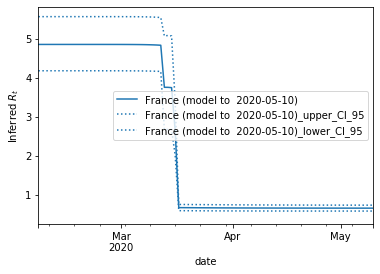

In [22]:
plot_Rt_country(model.data["modelling"], "France")

- `plot_Rt_forecast_country` plots a single country's confidence interval on the forecast of $R_t$

Plotting Forecast R(t) for France (forecast to  2020-05-09)


(<matplotlib.axes._subplots.AxesSubplot at 0x2021d2c4848>,
 'France (forecast to  2020-05-09)')

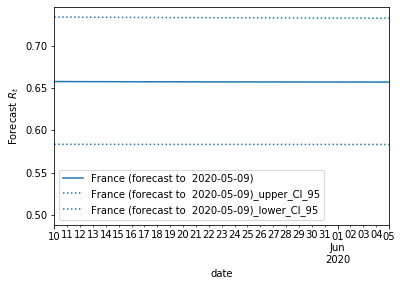

In [23]:
plot_Rt_forecast_country(model.data["forecasting"], "France")

- `plot_Rt_countries` plots multiple countries confidence interval on $R_t$

Plotting Inferred R(t) for France (model to  2020-05-10)
Plotting Inferred R(t) for Italy (model to  2020-05-10)


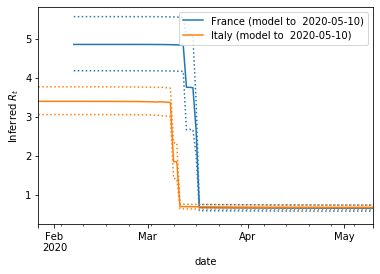

In [24]:
country_list = ["France", "Italy"]
plot_Rt_countries(model.data["modelling"], country_list=country_list)

- `plot_interventions_countries` plots the interventions (NPIs) of various countries

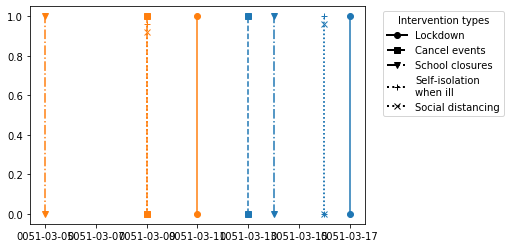

In [25]:
out = plot_interventions_countries(
    model.data["interventions"], country_list=country_list)

Not so useful on its owm this makes a lot more sense when passing it an existing axis (`ax=ax` below). 

Plotting Inferred R(t) for France (model to  2020-05-10)
Plotting Inferred R(t) for Italy (model to  2020-05-10)


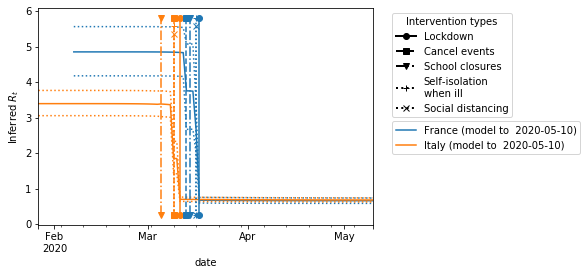

In [26]:
ax = plot_Rt_countries(
    model.data["modelling"], country_list=country_list)
out = plot_interventions_countries(
    model.data["interventions"], country_list=country_list, ax=ax)


Finally like the fatalities, all of this is written up into a convenience function that does it all: `compare_rt_and_interventions`


Plotting Inferred R(t) for France (model to  2020-05-10)
Plotting Inferred R(t) for Italy (model to  2020-05-10)
Plotting Inferred R(t) for Spain (model to  2020-05-10)
Plotting Inferred R(t) for United_Kingdom (model to  2020-05-10)
Plotting Forecast R(t) for France (forecast to  2020-05-09)
Plotting Forecast R(t) for Italy (forecast to  2020-05-09)
Plotting Forecast R(t) for Spain (forecast to  2020-05-09)
Plotting Forecast R(t) for United_Kingdom (forecast to  2020-05-09)


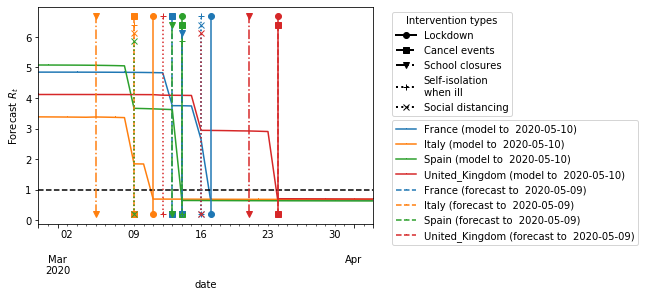

In [27]:
ax = compare_rt_and_interventions(
    model.data, country_list=["France", "Italy", "Spain", "United_Kingdom"])
axis_date_limits(ax, "2020-02-28", "2020-04-03")

Plotting Inferred R(t) for Auvergne-Rhône-Alpes
(model to  2020-05-10)
Plotting Forecast R(t) for Auvergne-Rhône-Alpes
(forecast to  2020-05-09)


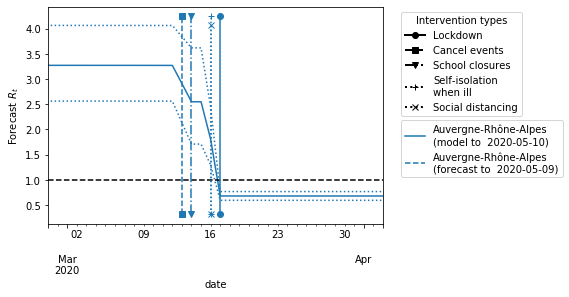

In [28]:
ax = compare_rt_and_interventions(
    model.data, country_list=["Auvergne-Rhône-Alpes"])
axis_date_limits(ax, "2020-02-28", "2020-04-03")

The final plot provided for comparing data from a single run combines a lot of these together it is `plot_zones_summary`:

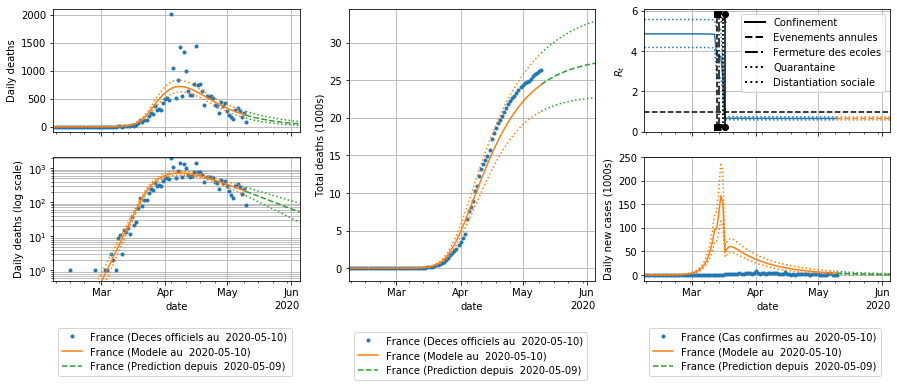

In [134]:
def translate_legend(ax):
    leg = ax.get_legend()
    if hasattr(leg, "get_texts"):
        for label in leg.get_texts():
            label.set_text(
                label.get_text()
                .replace("Reported deaths ", "Deces officiels ")
                .replace("Reported cases ", "Cas confirmes ")
                .replace("model ", "Modele ")
                .replace("forecast from", "Prediction depuis")
                .replace(" to ", " au ")
                .replace("Lockdown", "Confinement")
                .replace("Cancel events", "Evenements annules")
                .replace("School closures", "Fermeture des ecoles")
                .replace("Self-isolation\nwhen ill", "Quarantaine")
                .replace("Social distancing", "Distantiation sociale")
            )

axs = plot_zones_summary("France", model.data)
for ax in axs:
    translate_legend(ax)


Like many it also supports multi-country comparisons:

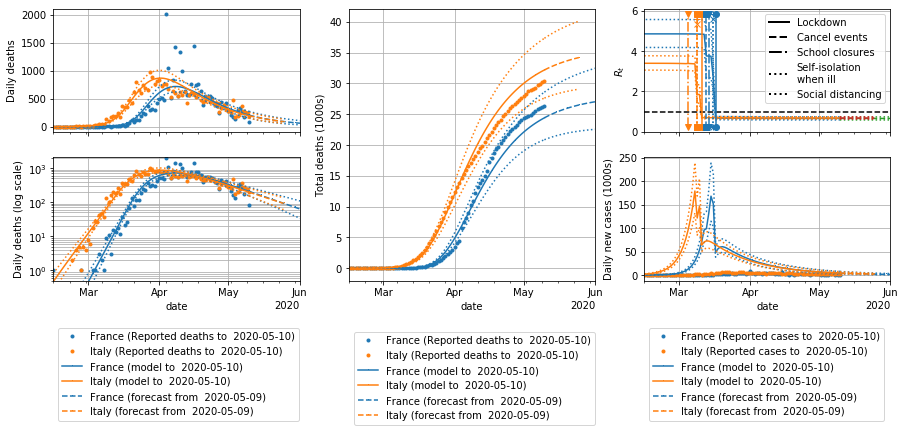

In [32]:
axs = plot_zones_summary(["France", "Italy"], model.data)
axis_date_limits(axs, min_date='2020-02-15', max_date='2020-06-01')  # This function supports lists of axes

### Plotting multiple executions together

Now we want to compare the result of various executions